### Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
def create_movie_class(param):
    result = ''
    if param <= 2:
        result = 'низкий рейтинг'
    elif param <= 4:
        result = 'средний рейтинг'
    else:
        result = 'высокий рейтинг'
    return result
    

In [3]:
df_ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [4]:
df_ratings['class'] = df_ratings['rating'].apply(create_movie_class)

In [5]:
df_ratings.head(-7)

,userId,movieId,rating,timestamp,class
0,1,31,2.500,1260759144,средний рейтинг
1,1,1029,3.000,1260759179,средний рейтинг
2,1,1061,3.000,1260759182,средний рейтинг
3,1,1129,2.000,1260759185,низкий рейтинг
4,1,1172,4.000,1260759205,средний рейтинг
...,...,...,...,...,...
99992,671,5816,4.000,1065111963,средний рейтинг
99993,671,5902,3.500,1064245507,средний рейтинг
99994,671,5952,5.000,1063502716,высокий рейтинг
99995,671,5989,4.000,1064890625,средний рейтинг


### Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [6]:
from pymystem3 import Mystem
m = Mystem()

In [7]:
df_keywords = pd.read_csv('keywords.csv')

In [8]:
df_keywords.head(2)

,keyword,shows
0,вк,64292779
1,одноклассники,63810309


In [9]:
df_keywords.describe()

,shows
count,100000.000
mean,25974.295
std,389212.533
min,1942.000
25%,5097.000
50%,7673.000
75%,14744.000
max,64292779.000


In [10]:
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск'] }

In [11]:
def get_region_from_keyword(param):
    for key, value in geo_data.items():
        if any(element in value for element in m.lemmatize(param)):
            return key

In [15]:
def get_region_from_keyword_fast(param):
    for key, value in geo_data.items():
        if any(element in value for element in param.split()):
            return key

In [20]:
%%time

df_keywords['region'] = 'undefined'
df_keywords['region'] = df_keywords.keyword.apply(get_region_from_keyword).fillna('undefined')

CPU times: user 5.1 s, sys: 1.71 s, total: 6.81 s
Wall time: 34.9 s


In [21]:
%%time

df_keywords['region_fast'] = 'undefined'
df_keywords['region_fast'] = df_keywords.keyword.apply(get_region_from_keyword_fast).fillna('undefined')

CPU times: user 237 ms, sys: 1.48 ms, total: 238 ms
Wall time: 237 ms


In [22]:
df_keywords[df_keywords.keyword.str.contains('москва')].head()

,keyword,shows,region,region_fast
127,авито москва,979292,Центр,Центр
1259,москва,153050,Центр,Центр
1396,гисметео москва,140279,Центр,Центр
1482,госуслуги москва,133061,Центр,Центр
1682,погода москва,151701,Центр,Центр


In [23]:
#, 'тула', 'ярославль'
df_keywords[df_keywords.keyword.str.contains('петербург')].head()

,keyword,shows,region,region_fast
370,авито ру санкт петербург,425134,Северо-Запад,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад,undefined
1236,банк санкт петербург,174375,Северо-Запад,Северо-Запад
1346,санкт петербург,144232,Северо-Запад,Северо-Запад
2121,электронный дневник санкт петербургского образ...,94835,undefined,undefined


### Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [24]:
df_ratings.head()

,userId,movieId,rating,timestamp,class
0,1,31,2.500,1260759144,средний рейтинг
1,1,1029,3.000,1260759179,средний рейтинг
2,1,1061,3.000,1260759182,средний рейтинг
3,1,1129,2.000,1260759185,низкий рейтинг
4,1,1172,4.000,1260759205,средний рейтинг


In [25]:
import re
import numpy as np
import matplotlib

In [26]:
year = np.arange(1950, 2011)

In [27]:
df_movies = pd.read_csv('ml-latest-small/movies.csv')

In [28]:
df_movies[df_movies.title == 'World of Apu, The (Apur Sansar) (1959)'].head()

,movieId,title,genres
574,670,"World of Apu, The (Apur Sansar) (1959)",Drama


In [29]:
df_movies.loc[29]

movieId                                                   30
title      Shanghai Triad (Yao a yao yao dao waipo qiao) ...
genres                                           Crime|Drama
Name: 29, dtype: object

In [30]:
def production_year(param):
    #param = row.title
    if np.isin(re.findall('(?<=\()(\d{4})(?=\))', param['title']), year):
        return re.findall('(?<=\()(\d{4})(?=\))', param['title'])[0]
    else:
        return 1900

In [31]:
def alternative_production_year(param):
    #param = row.title
    if len(re.findall('(?<=\()(\d{4})(?=\))', param['title'])) > 0:
        return re.findall('(?<=\()(\d{4})(?=\))', param['title'])[0]
    else:
        return 1900

In [32]:
df_movies['year'] = df_movies.apply(production_year, axis=1)

/Users/d.kolesova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
df_movies['alternative_year'] = df_movies.apply(alternative_production_year, axis=1)

In [34]:
df_movies.iloc[:-20]

,movieId,title,genres,year,alternative_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,1995
4,5,Father of the Bride Part II (1995),Comedy,1995,1995
...,...,...,...,...,...
9100,160271,Central Intelligence (2016),Action|Comedy,1900,2016
9101,160438,Jason Bourne (2016),Action,1900,2016
9102,160440,The Maid's Room (2014),Thriller,1900,2014
9103,160563,The Legend of Tarzan (2016),Action|Adventure,1900,2016


In [35]:
df_ratings_movies = df_ratings.merge(df_movies, how='left')

In [36]:
df_ratings_movies.groupby('year').mean()['rating'].sort_values(ascending=False)

year
1957   4.014
1972   4.011
1952   4.000
1954   3.994
1951   3.984
        ... 
2005   3.448
2003   3.445
1996   3.427
1997   3.416
2000   3.356
Name: rating, Length: 62, dtype: float64

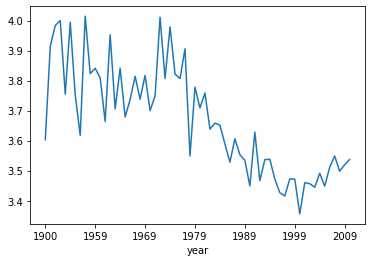

In [37]:
df_ratings_movies.groupby('year').mean()['rating'].plot.line()

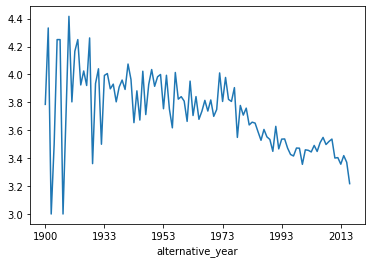

In [38]:
df_ratings_movies.groupby('alternative_year').mean()['rating'].plot.line()

In [39]:
df_ratings_movies.groupby('alternative_year').mean()['rating'].sort_values(ascending=False).head(15)

alternative_year
1921   4.417
1902   4.333
1928   4.262
1917   4.250
1918   4.250
1924   4.250
1923   4.167
1941   4.075
1931   4.041
1949   4.035
1926   4.025
1946   4.023
1957   4.014
1972   4.011
1934   4.007
Name: rating, dtype: float64

In [40]:
df_ratings_movies['alternative_year'] = df_ratings_movies['alternative_year'].astype('int')

In [41]:
df_ratings_movies[df_ratings_movies.alternative_year < 1930]

,userId,movieId,rating,timestamp,class,title,genres,year,alternative_year
280,4,2102,5.000,949949396,высокий рейтинг,Steamboat Willie (1928),Animation|Children|Comedy|Musical,1900,1928
1390,15,2010,3.000,1052896685,средний рейтинг,Metropolis (1927),Drama|Sci-Fi,1900,1927
1686,15,3742,2.500,1082220261,средний рейтинг,Battleship Potemkin (1925),Drama|War,1900,1925
2001,15,6433,3.000,1465793939,средний рейтинг,"Man with the Movie Camera, The (Chelovek s kin...",Documentary,1900,1929
2786,17,1348,5.000,1127470930,высокий рейтинг,"Nosferatu (Nosferatu, eine Symphonie des Graue...",Horror,1900,1922
...,...,...,...,...,...,...,...,...,...
96825,648,3306,4.000,1176328041,средний рейтинг,"Circus, The (1928)",Comedy,1900,1928
96827,648,3310,3.500,1177190151,средний рейтинг,"Kid, The (1921)",Comedy|Drama,1900,1921
96833,648,3629,4.000,1176155318,средний рейтинг,"Gold Rush, The (1925)",Adventure|Comedy|Romance,1900,1925
96894,648,8511,4.000,1176571215,средний рейтинг,"Immigrant, The (1917)",Comedy,1900,1917
